# Malaria Detection Using CNN

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

**Data Preprocessing**

In [3]:
data_dir = r"C:\\Users\\pc\\Desktop\\__pycache__\\New folder\\Dataset"  # Use raw string for Windows paths
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')


In [4]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

In [5]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.15  # Reserve 15% for validation
)

In [6]:
# Training data
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

Found 354 images belonging to 2 classes.


In [7]:
# Validation data
val_data = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'  
)

Found 62 images belonging to 2 classes.


In [8]:
# Test data (no validation split needed)
test_data = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 134 images belonging to 2 classes.


**Build the CNN Model**

In [11]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**Training the Model**

In [12]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    verbose=1
)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 610ms/step - accuracy: 0.4641 - loss: 1.1652 - val_accuracy: 0.5323 - val_loss: 0.6867
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 524ms/step - accuracy: 0.5461 - loss: 0.7060 - val_accuracy: 0.5323 - val_loss: 0.6922
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 560ms/step - accuracy: 0.5787 - loss: 0.6905 - val_accuracy: 0.5323 - val_loss: 0.6927
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 519ms/step - accuracy: 0.5579 - loss: 0.6917 - val_accuracy: 0.5323 - val_loss: 0.6870
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 525ms/step - accuracy: 0.5482 - loss: 0.6842 - val_accuracy: 0.5323 - val_loss: 0.6696
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 511ms/step - accuracy: 0.5442 - loss: 0.6906 - val_accuracy: 0.5323 - val_loss: 0.6929
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 522ms/step - accuracy: 0.5680 - loss: 0.6923 - val_accuracy: 0.5323 - val_loss: 0.6929
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 504ms/step - accuracy: 0.5378 - loss: 0.6917 - val_accuracy: 0

**Evaluating the Model**

In [14]:
loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy:.2f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6157 - loss: 0.6788 
Test Accuracy: 0.54


**Classification report and confusion matrix**

In [17]:
Y_pred = model.predict(test_data)
Y_pred_classes = (Y_pred > 0.5).astype(int)
y_true = test_data.classes

print("Classification Report:")
classification_report(y_true, Y_pred_classes, target_names=['Uninfected', 'Parasitized'])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Classification Report:


'              precision    recall  f1-score   support\n\n  Uninfected       0.65      0.69      0.67        91\n Parasitized       0.24      0.21      0.23        43\n\n    accuracy                           0.54       134\n   macro avg       0.45      0.45      0.45       134\nweighted avg       0.52      0.54      0.53       134\n'

In [18]:
print("Confusion Matrix:")
confusion_matrix(y_true, Y_pred_classes)

Confusion Matrix:


array([[63, 28],
       [34,  9]], dtype=int64)

In [19]:
model.save('malaria_cnn_model.h5')

**Training and Validation Accuracy Over Epochs**

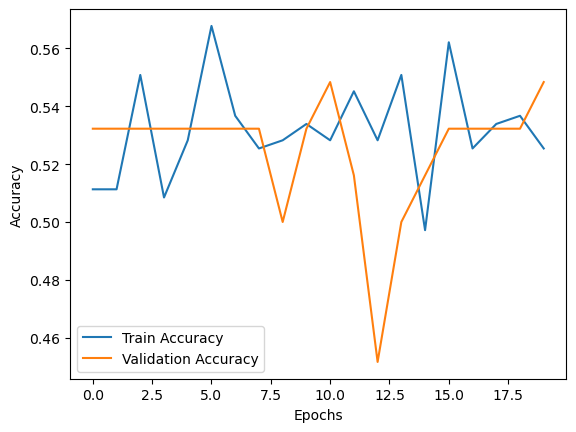

In [20]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**Training and Validation Loss Over Epochs**

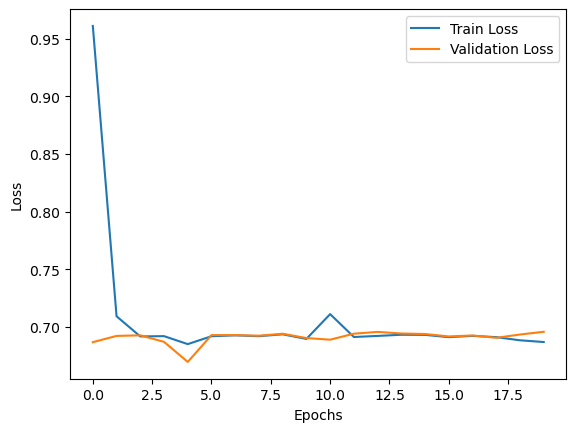

In [21]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


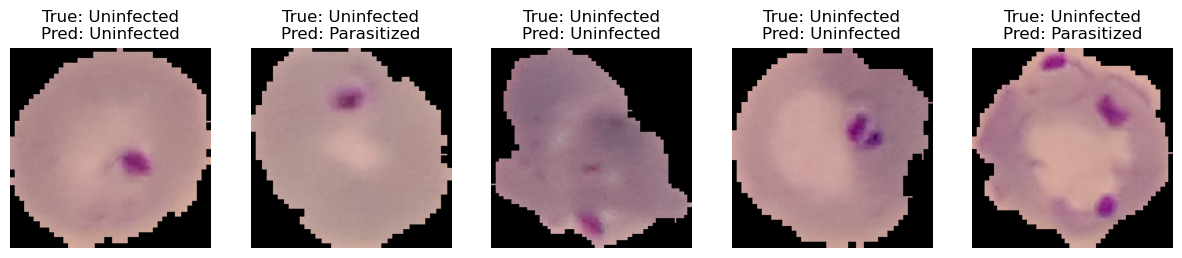

In [22]:
def display_predictions(test_data, model, num_images=5):
    images, labels = next(test_data)
    
    predictions = model.predict(images)
    predicted_labels = (predictions > 0.5).astype(int)
    
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        ax = axes[i]
        img = images[i]
        ax.imshow(img)
        true_label = 'Parasitized' if labels[i] == 1 else 'Uninfected'
        pred_label = 'Parasitized' if predicted_labels[i] == 1 else 'Uninfected'
        ax.set_title(f"True: {true_label}\nPred: {pred_label}")
        ax.axis('off') 
    plt.show()

display_predictions(test_data, model, num_images=5)